## Data Cleaning
Data cleaning is the process of preparing data for analysis / ML / DL  by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.

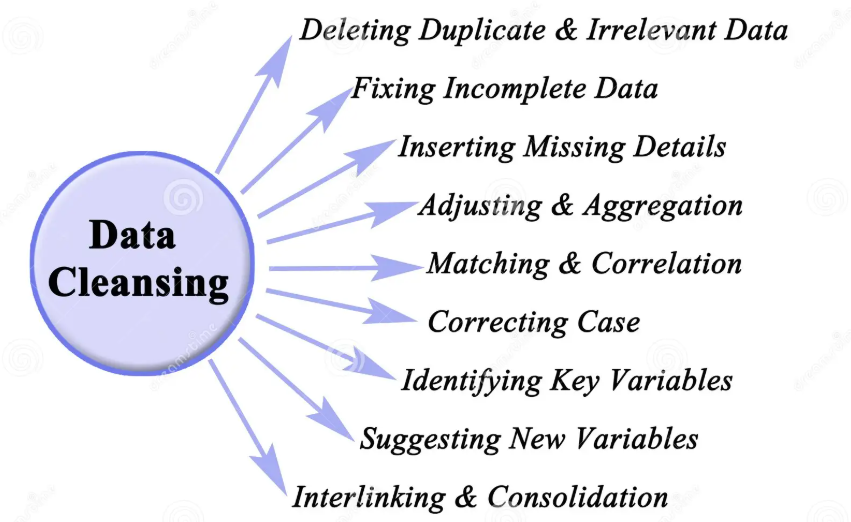

# Steps in Data Cleaning

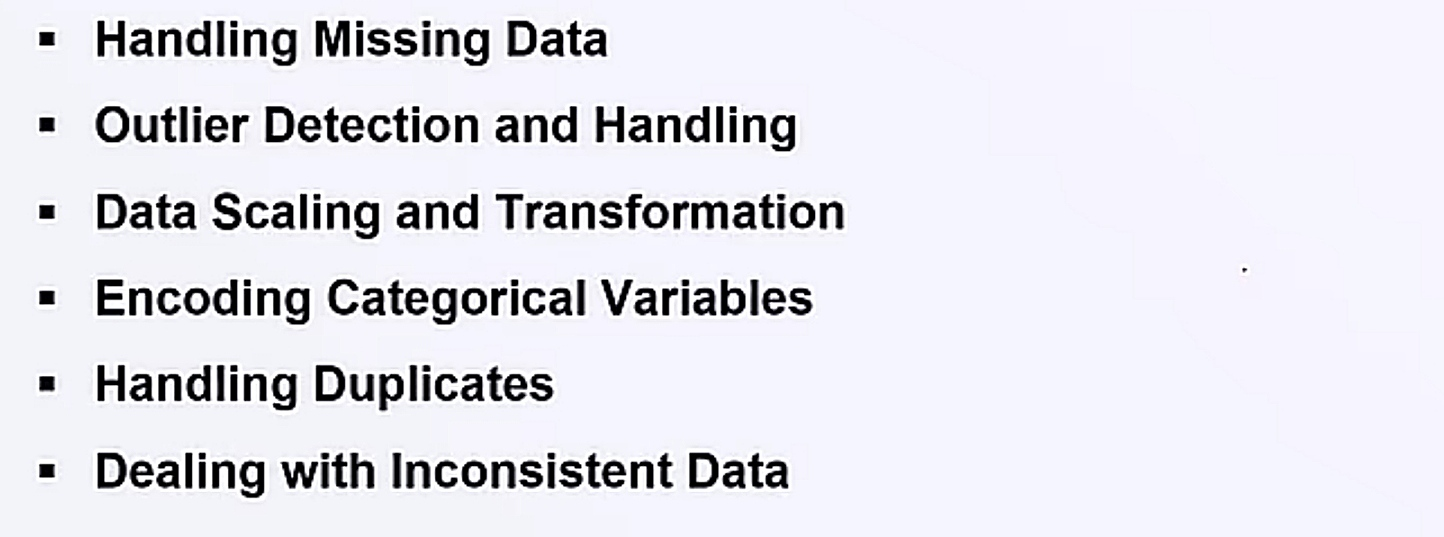

# What is missing value and how to find it ?

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv('loan_test.csv')
dataset.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [27]:
# Now we have to find how many overall data is present i.e, how many number no. of rows and columns is present in our data.
# without finding that first we not be able to calculate percentage% of null values in particular column and % of null values overall in our data.

In [28]:
dataset.shape

(367, 11)

In [29]:
# finding total number of rows...
dataset.shape[0]

367

In [30]:
# finding null values
dataset.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

In [31]:
# calculating % null values for better understandings
# by applying the formula of percentage we can get % of null values overall in a particular columns

In [32]:
dataset.isnull().sum()/dataset.shape[0]*100

Gender                2.997275
Married               0.000000
Dependents            2.724796
Education             0.000000
Self_Employed         6.267030
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  1.634877
Credit_History        7.901907
Area                  0.000000
dtype: float64

In [33]:
# Finding overall null values in a data
dataset.isnull().sum().sum()

79

In [34]:
# overall percemtage of null values in our dataset
dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

1.956898687143919

In [35]:
# we can also find not null values in our dataset
dataset.notnull().sum()

Gender                356
Married               367
Dependents            357
Education             367
Self_Employed         344
Applicant_Income      367
Coapplicant_Income    367
Loan_Amount           367
Term                  361
Credit_History        338
Area                  367
dtype: int64

In [36]:
dataset.notnull().sum().sum()

3958

In [37]:
dataset.notnull().sum()/dataset.shape[0]*100

Gender                 97.002725
Married               100.000000
Dependents             97.275204
Education             100.000000
Self_Employed          93.732970
Applicant_Income      100.000000
Coapplicant_Income    100.000000
Loan_Amount           100.000000
Term                   98.365123
Credit_History         92.098093
Area                  100.000000
dtype: float64

In [38]:
dataset.notnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

98.04310131285608

#### PLotting null graphs

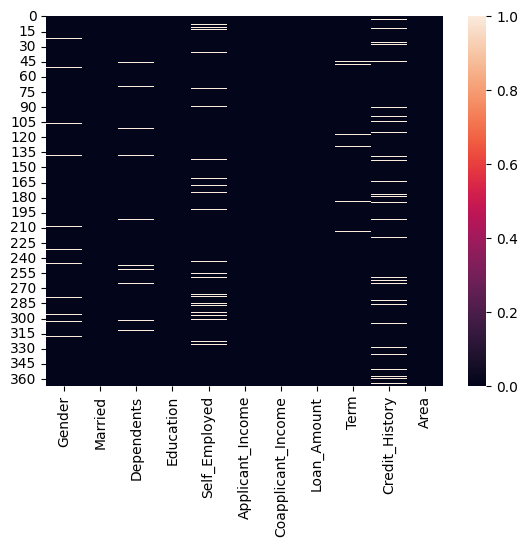

In [40]:
sns.heatmap(dataset.isnull())
plt.show()

In [42]:
# True = 1 (null values present)
# False = 0 (null values is absent)

#### If you have null values present more than 50% do not work on data (half data is blank or unfilled)
#### if null  values prsent less than 50% we can work on then to get some insights

## Handling Missing Values (DROPPING)

In [44]:
dataset.shape

(367, 11)

In [45]:
dataset.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

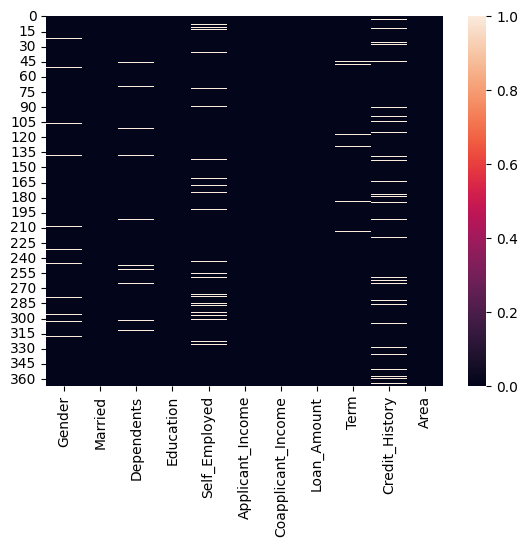

In [46]:
sns.heatmap(dataset.isnull())
plt.show()

### Deleting missing content
#### Column wise delete
* If 50% null values present in a particular column , delete that particular column.

In [47]:
# observe more no. of missing values is present in which columns
# after observing dataset we get credit_History columns have max no. of null values = 29
# we can drop this column by...
dataset.drop(columns=['Credit_History'],inplace=True)


In [48]:
# check
dataset.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Area                   0
dtype: int64

In [50]:
#check
dataset.shape

(367, 10)

#### Row wise delete
* If 50% null values present in a particular row, delete that row .

In [52]:
dataset.dropna(inplace=True)

In [53]:
dataset.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Area                  0
dtype: int64

In [54]:
dataset.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,Urban
5,Male,Yes,0,Not Graduate,Yes,216500,342200,15200000,360.0,Urban
6,Female,No,1,Not Graduate,No,222600,0,5900000,360.0,Semiurban
7,Male,Yes,2,Not Graduate,No,388100,0,14700000,360.0,Rural
9,Male,No,0,Not Graduate,No,240000,240000,12300000,360.0,Semiurban
10,Male,No,0,Not Graduate,No,309100,0,9000000,360.0,Urban


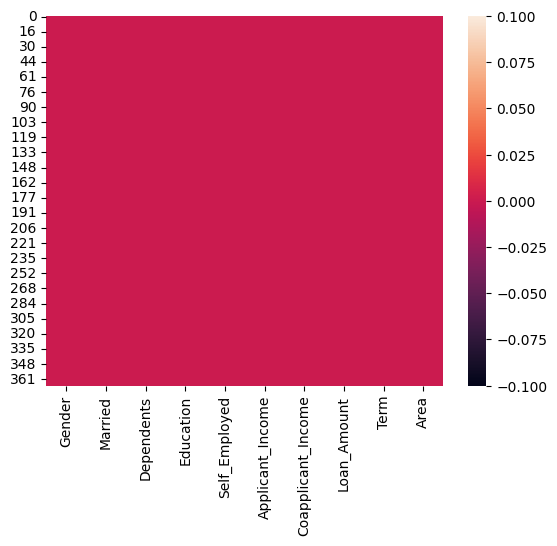

In [55]:
sns.heatmap(dataset.isnull())
plt.show()

In [56]:
dataset.shape

(318, 10)

In [58]:
# we can also check hoe many rows we lose..
((367-318)/367*100)

13.35149863760218

In [ ]:
# we have losed 13 % of our data

## Handling Missing Values
### (Imputing Category Data)

In [59]:
dataset.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,Urban


In [60]:
dataset.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Area                  0
dtype: int64

In [62]:
# dataset.fillna(10) is not a good way to fill data in all column

In [66]:
dataset.fillna(method='bfill',axis=1)

C:\Users\asmas\AppData\Local\Temp\ipykernel_13264\275625381.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='bfill',axis=1)


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,Urban
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,Rural


In [64]:
dataset.info() # we can chcek datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 366
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              318 non-null    object 
 1   Married             318 non-null    object 
 2   Dependents          318 non-null    object 
 3   Education           318 non-null    object 
 4   Self_Employed       318 non-null    object 
 5   Applicant_Income    318 non-null    int64  
 6   Coapplicant_Income  318 non-null    int64  
 7   Loan_Amount         318 non-null    int64  
 8   Term                318 non-null    float64
 9   Area                318 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 27.3+ KB


In [69]:
dataset['Gender'].mode()[0]

'Male'

In [77]:
# fillind mode in a particular column having object datatype

In [78]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

C:\Users\asmas\AppData\Local\Temp\ipykernel_13264\2782724874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)


In [84]:
# If we want to fill mode in all object type of data we have to do...
# first we have to collect all object datatype from our data

In [85]:
 dataset.select_dtypes(include='object').isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Area             0
dtype: int64

In [86]:
# now we have to fill mode in all object types of columns given above

In [90]:
 for i in dataset.select_dtypes(include='object').columns:
     dataset[i].fillna(dataset[i].mode()[0],inplace=True)

C:\Users\asmas\AppData\Local\Temp\ipykernel_13264\4248680408.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace=True)


In [91]:
# check if the mode is filled or not
dataset.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Area                  0
dtype: int64

In [92]:
# so this is how we can fill mode in our categorical data.